In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Step 0: Setup & Imports

In [2]:
# Step 0: Setup & Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print(f"TensorFlow: {tf.__version__}")

2025-09-28 19:23:22.363065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759087402.561154      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759087402.614860      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow: 2.18.0


### Step 1: Load & Preprocess Data 

In [3]:
# Step 1: Load & prepare data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize -> [0,1]
x_train, x_test = x_train/255.0, x_test/255.0

#Flatten(ANN input is 1D vector, not images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1,784)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 784), Test shape: (10000, 784)


### Step 2: Define Model Architecture(ANN)


In [4]:
# Step 2: Define Model (with Relu )
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

I0000 00:00:1759087416.171614      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


### Step 3: Compile Model
* Optimizer -> Adam (efficient backdrop with adaptive LR)
* Loss -> sparse categorical corossentropy (for integer labels)
* Metrics -> accuracy

In [5]:
# Step 3: Compile Model
model_relu.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Step 4: Train Model (Backpropagation in Action)
* This is automatically implemented by Tensorflow during .fit()
* Showing training vs validation curves

In [6]:
# Step 4: Train Model
history_relu = model_relu.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=.1,
    verbose=2
)

Epoch 1/10


I0000 00:00:1759087419.241451      59 service.cc:148] XLA service 0x7df810007da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759087419.242255      59 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759087419.431899      59 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1759087420.077497      59 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


844/844 - 5s - 6ms/step - accuracy: 0.9154 - loss: 0.2901 - val_accuracy: 0.9633 - val_loss: 0.1240
Epoch 2/10
844/844 - 2s - 2ms/step - accuracy: 0.9636 - loss: 0.1213 - val_accuracy: 0.9715 - val_loss: 0.0954
Epoch 3/10
844/844 - 2s - 2ms/step - accuracy: 0.9752 - loss: 0.0814 - val_accuracy: 0.9717 - val_loss: 0.0996
Epoch 4/10
844/844 - 2s - 2ms/step - accuracy: 0.9815 - loss: 0.0617 - val_accuracy: 0.9767 - val_loss: 0.0842
Epoch 5/10
844/844 - 2s - 2ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9727 - val_loss: 0.0943
Epoch 6/10
844/844 - 2s - 2ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9753 - val_loss: 0.0937
Epoch 7/10
844/844 - 2s - 2ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9763 - val_loss: 0.0855
Epoch 8/10
844/844 - 2s - 2ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9768 - val_loss: 0.0880
Epoch 9/10
844/844 - 2s - 2ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9768 - val_loss: 0.0919
Epoch 10/10


### Step 5: Evaluate Model
* Test on unseen data

In [7]:
loss, acc = model_relu.evaluate(x_test, y_test, verbose=0)
print(f"ReLU Test Accuracy:{acc}")

ReLU Test Accuracy:0.9779999852180481


### Step 6: Compare Activation Functions
1. Sigmoid
2. tanh
- With repeating concepts from 2-5

In [8]:
# Step 6 two more activation functions
#-> Sigmoid==========================================================================
# Step 2: Model definition for sigmoid
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid',input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 3: Model compiling
model_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Step 4: Train model
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=.1, verbose=2)

# Step 5: Evaluate
loss, acc = model_sigmoid.evaluate(x_test, y_test, verbose=0)
print(f"Sigmoid Test Accuracy:{acc} Loss: {loss}")
# ==================================================================================

#-> tanh============================================================================
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh',input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 3: Model Compile
model_tanh.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Step 4: Train Model with(fit )
history_tanh = model_tanh.fit(x_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=.1,
                        verbose=2
                        )
# Step 5: Evalaute 
loss, acc = model_tanh.evaluate(x_test, y_test, verbose=0)
print(f"Tanh Test Accuracy:{acc} Tanh: {loss}")

Epoch 1/10
844/844 - 5s - 5ms/step - accuracy: 0.8520 - loss: 0.6298 - val_accuracy: 0.9393 - val_loss: 0.2217
Epoch 2/10
844/844 - 2s - 2ms/step - accuracy: 0.9345 - loss: 0.2276 - val_accuracy: 0.9597 - val_loss: 0.1565
Epoch 3/10
844/844 - 2s - 2ms/step - accuracy: 0.9504 - loss: 0.1659 - val_accuracy: 0.9677 - val_loss: 0.1248
Epoch 4/10
844/844 - 2s - 2ms/step - accuracy: 0.9619 - loss: 0.1296 - val_accuracy: 0.9698 - val_loss: 0.1089
Epoch 5/10
844/844 - 2s - 2ms/step - accuracy: 0.9698 - loss: 0.1045 - val_accuracy: 0.9732 - val_loss: 0.0974
Epoch 6/10
844/844 - 2s - 2ms/step - accuracy: 0.9750 - loss: 0.0858 - val_accuracy: 0.9755 - val_loss: 0.0905
Epoch 7/10
844/844 - 2s - 2ms/step - accuracy: 0.9794 - loss: 0.0712 - val_accuracy: 0.9733 - val_loss: 0.0875
Epoch 8/10
844/844 - 2s - 2ms/step - accuracy: 0.9829 - loss: 0.0599 - val_accuracy: 0.9763 - val_loss: 0.0816
Epoch 9/10
844/844 - 2s - 2ms/step - accuracy: 0.9858 - loss: 0.0498 - val_accuracy: 0.9767 - val_loss: 0.0778
E

### Step 7: visualization & Comparison

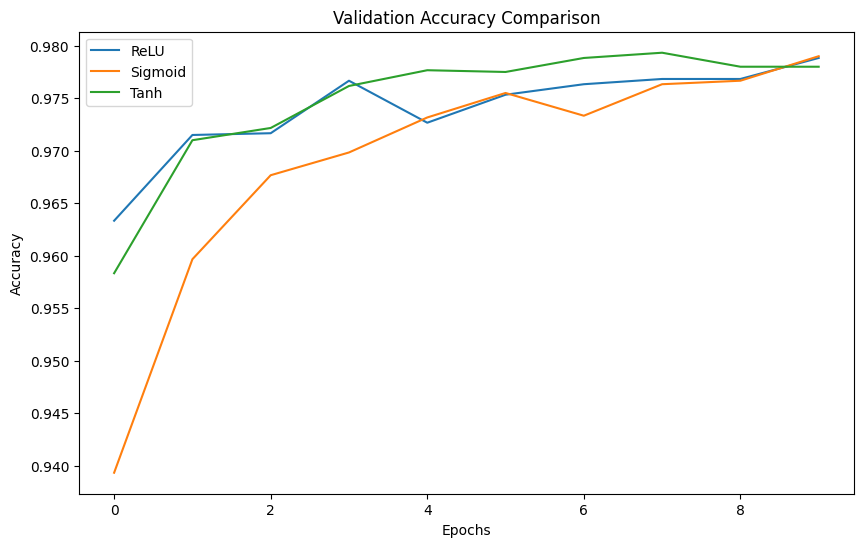

In [9]:
# Step 7: Compare Training Histories
plt.figure(figsize=(10,6))
plt.plot(history_relu.history['val_accuracy'],label='ReLU')
plt.plot(history_sigmoid.history['val_accuracy'],label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 8: Notes & Comments
* ReLU -> train faster, avoids vanishing gradients
* Sigmoid -> squashes values(good for probabilites)but suffers vanishing gradients
* Tanh -> zero-centered, often better than sigmoid but still vanishes in deep nets.
* softmax -> required at output for multi-class classification
## Assignment Alignment
* Backpropagation -> implemented implicitly via .fit() (Tensorflow does the backpropagation math).
* Vary activation functions -> done in step 2-7
* Test on dataset -> MNIST
* Compare results -> graphs + interpretation